# Regression with Keras

In [9]:
import pandas as pd
import numpy as np

In [10]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Split data into predictors and target


In [11]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

Finally, the last step is to normalize the data by substracting the mean and dividing by the standard deviation.


In [12]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


Let's save the number of predictors to *n_cols* since we will need this number when building our network.

In [13]:
n_cols = predictors_norm.shape[1] # number of predictors

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [15]:
def regression_model():
    model = Sequential()

    model.add(Dense(50, activation="relu", input_shape=(n_cols,)))
    model.add(Dense(50, activation="relu"))
    model.add(Dense(1))

    model.compile(optimizer="adam", loss="mean_squared_error")

    return model

## Train and Test the Network

* `verbose=0`: No output will be displayed during training.
* `verbose=1`: Progress bars will be shown for each epoch, displaying the loss and any metrics being tracked.
* `verbose=2`: One line per epoch will be printed, showing the epoch number, loss, and metrics without a progress bar.

In [16]:
model = regression_model()
model.fit(predictors_norm, target, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 - 2s - 84ms/step - loss: 1644.2986 - val_loss: 1135.1873
Epoch 2/100
23/23 - 0s - 9ms/step - loss: 1500.0557 - val_loss: 986.4418
Epoch 3/100
23/23 - 0s - 7ms/step - loss: 1266.1302 - val_loss: 763.0084
Epoch 4/100
23/23 - 0s - 6ms/step - loss: 923.9352 - val_loss: 501.2324
Epoch 5/100
23/23 - 0s - 7ms/step - loss: 561.3286 - val_loss: 300.0278
Epoch 6/100
23/23 - 0s - 6ms/step - loss: 323.7988 - val_loss: 214.2456
Epoch 7/100
23/23 - 0s - 15ms/step - loss: 244.5293 - val_loss: 190.5838
Epoch 8/100
23/23 - 0s - 14ms/step - loss: 218.5957 - val_loss: 180.0509
Epoch 9/100
23/23 - 0s - 8ms/step - loss: 205.5467 - val_loss: 173.5136
Epoch 10/100
23/23 - 0s - 6ms/step - loss: 196.6109 - val_loss: 171.1887
Epoch 11/100
23/23 - 0s - 15ms/step - loss: 189.4981 - val_loss: 170.5145
Epoch 12/100
23/23 - 0s - 9ms/step - loss: 183.0731 - val_loss: 168.9857
Epoch 13/100
23/23 - 0s - 6ms/step - loss: 178.5799 - val_loss: 168.1385
Epoch 14/100
23/23 - 0s - 7ms/step - loss: 173.4196 - val_loss: 

# Classification with Keras

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import mnist

import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


(60000, 28, 28)

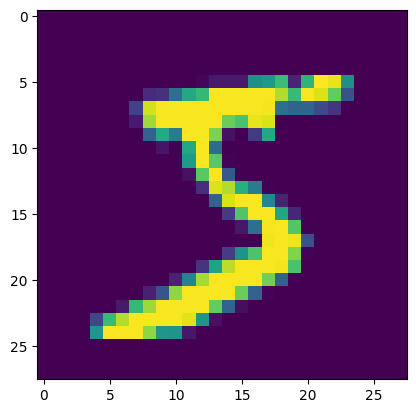

In [3]:
plt.imshow(X_train[0])

With conventional neural networks, we cannot feed in the image as input as is. So we need to flatten the images into one-dimensional vectors, each of size 1 x (28 x 28) = 1 x 784.


In [4]:
# flatten images into one-dimensional vector
num_pixels = X_train.shape[1] * X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype("float32")
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype("float32")

Since pixel values can range from 0 to 255, let's normalize the vectors to be between 0 and 1.

In [5]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

Finally, before we start building our model, remember that for classification we need to divide our target variable into categories. We use the to_categorical function from the Keras Utilities package.


In [6]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


In [7]:
def classification_model():
    # Create model
    model = Sequential()

    model.add(Dense(num_pixels, activation="relu", input_shape=(num_pixels,)))
    model.add(Dense(100, activation="relu"))
    model.add(Dense(num_classes, activation="softmax"))

    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    return model

## Train and Test the Network


* `verbose=0`: No output will be displayed during training.
* `verbose=1`: Progress bars will be shown for each epoch, displaying the loss and any metrics being tracked.
* `verbose=2`: One line per epoch will be printed, showing the epoch number, loss, and metrics without a progress bar.

In [8]:
model = classification_model()

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

scores = model.evaluate(X_test, y_test, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 - 22s - 12ms/step - accuracy: 0.9437 - loss: 0.1850 - val_accuracy: 0.9700 - val_loss: 0.0915
Epoch 2/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9757 - loss: 0.0789 - val_accuracy: 0.9765 - val_loss: 0.0788
Epoch 3/10
1875/1875 - 40s - 21ms/step - accuracy: 0.9829 - loss: 0.0537 - val_accuracy: 0.9758 - val_loss: 0.0833
Epoch 4/10
1875/1875 - 18s - 10ms/step - accuracy: 0.9868 - loss: 0.0393 - val_accuracy: 0.9782 - val_loss: 0.0798
Epoch 5/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9892 - loss: 0.0339 - val_accuracy: 0.9781 - val_loss: 0.0858
Epoch 6/10
1875/1875 - 40s - 21ms/step - accuracy: 0.9918 - loss: 0.0255 - val_accuracy: 0.9801 - val_loss: 0.0742
Epoch 7/10
1875/1875 - 40s - 21ms/step - accuracy: 0.9927 - loss: 0.0219 - val_accuracy: 0.9837 - val_loss: 0.0697
Epoch 8/10
1875/1875 - 18s - 9ms/step - accuracy: 0.9933 - loss: 0.0202 - val_accuracy: 0.9805 - val_loss: 0.0864
Epoch 9/10
1875/1875 - 18s - 10ms/step - accuracy: 0.9947 - loss: 0.0172 - val_ac

In [9]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))

Accuracy: 0.9811999797821045% 
 Error: 0.018800020217895508


Just running 10 epochs could actually take over 20 minutes. But enjoy the results as they are getting generated.


Sometimes, you cannot afford to retrain your model everytime you want to use it, especially if you are limited on computational resources and training your model can take a long time. Therefore, with the Keras library, you can save your model after training. To do that, we use the save method.

In [10]:
model.save('classification_model.keras')

Since our model contains multidimensional arrays of data, then models are usually saved as .h5 files.

When you are ready to use your model again, you use the load_model function from <strong>keras.models</strong>.


In [23]:
from keras.models import load_model
import numpy as np
pretrained_model = load_model('classification_model.keras')

We can use the pretrained model to make a prediction

In [28]:
predictions = pretrained_model.predict(X_train[0].reshape(-1, 784))

print(f"\nModel predictions: {predictions}")

print(f"\nFinal result: {np.argmax(predictions, axis=1)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

Model predictions: [[1.27257755e-23 2.25379161e-19 1.16458272e-18 1.09098757e-04
  9.66026837e-24 9.99890924e-01 1.16350542e-15 2.16392851e-21
  5.42052489e-19 2.19365532e-16]]

Final result: [5]


# CNN with Keras

## 1 Layer of convolutional and pooling layers

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.datasets import mnist

In [6]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Let's normalize the pixel values to be between 0 and 1

In [7]:
X_train = X_train / 255 # normalize training data
X_test = X_test / 255 # normalize test data

Next, let's convert the target variable into binary categories


In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1] # number of categories

In [9]:
def convolutional_model():
    model = Sequential()

    model.add(Conv2D(16, (5,5), strides=(1,1), activation="relu", input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())

    model.add(Dense(100, activation="relu"))
    model.add(Dense(num_classes, activation="softmax"))

    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    return model

* `verbose=0`: No output will be displayed during training.
* `verbose=1`: Progress bars will be shown for each epoch, displaying the loss and any metrics being tracked.
* `verbose=2`: One line per epoch will be printed, showing the epoch number, loss, and metrics without a progress bar.

In [39]:
model = convolutional_model()

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {scores[1]} Error: {100-scores[1]*100}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
300/300 - 23s - 78ms/step - accuracy: 0.9252 - loss: 0.2767 - val_accuracy: 0.9718 - val_loss: 0.0966
Epoch 2/10
300/300 - 22s - 74ms/step - accuracy: 0.9764 - loss: 0.0805 - val_accuracy: 0.9794 - val_loss: 0.0625
Epoch 3/10
300/300 - 44s - 146ms/step - accuracy: 0.9839 - loss: 0.0549 - val_accuracy: 0.9848 - val_loss: 0.0482
Epoch 4/10
300/300 - 38s - 127ms/step - accuracy: 0.9873 - loss: 0.0438 - val_accuracy: 0.9849 - val_loss: 0.0425
Epoch 5/10
300/300 - 41s - 135ms/step - accuracy: 0.9897 - loss: 0.0349 - val_accuracy: 0.9852 - val_loss: 0.0404
Epoch 6/10
300/300 - 21s - 70ms/step - accuracy: 0.9913 - loss: 0.0286 - val_accuracy: 0.9869 - val_loss: 0.0402
Epoch 7/10
300/300 - 42s - 139ms/step - accuracy: 0.9930 - loss: 0.0236 - val_accuracy: 0.9887 - val_loss: 0.0339
Epoch 8/10
300/300 - 41s - 136ms/step - accuracy: 0.9935 - loss: 0.0198 - val_accuracy: 0.9887 - val_loss: 0.0363
Epoch 9/10
300/300 - 20s - 68ms/step - accuracy: 0.9954 - loss: 0.0163 - val_accuracy: 0.98

## 2 Layer of convolutional and pooling layers

In [10]:
def convolutional_model():

    model = Sequential()
    model.add(Conv2D(16, (5, 5), activation="relu", input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(8, (2, 2), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())

    model.add(Dense(100, activation="relu"))
    model.add(Dense(num_classes, activation="softmax"))

    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    return model

In [11]:
model = convolutional_model()

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {scores[1]} Error: {100-scores[1]*100}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
300/300 - 23s - 77ms/step - accuracy: 0.8733 - loss: 0.4516 - val_accuracy: 0.9590 - val_loss: 0.1330
Epoch 2/10
300/300 - 40s - 135ms/step - accuracy: 0.9645 - loss: 0.1191 - val_accuracy: 0.9730 - val_loss: 0.0856
Epoch 3/10
300/300 - 22s - 72ms/step - accuracy: 0.9735 - loss: 0.0884 - val_accuracy: 0.9760 - val_loss: 0.0756
Epoch 4/10
300/300 - 20s - 66ms/step - accuracy: 0.9782 - loss: 0.0719 - val_accuracy: 0.9825 - val_loss: 0.0554
Epoch 5/10
300/300 - 22s - 72ms/step - accuracy: 0.9810 - loss: 0.0623 - val_accuracy: 0.9818 - val_loss: 0.0528
Epoch 6/10
300/300 - 21s - 69ms/step - accuracy: 0.9837 - loss: 0.0536 - val_accuracy: 0.9838 - val_loss: 0.0488
Epoch 7/10
300/300 - 42s - 138ms/step - accuracy: 0.9857 - loss: 0.0477 - val_accuracy: 0.9843 - val_loss: 0.0479
Epoch 8/10
300/300 - 20s - 66ms/step - accuracy: 0.9873 - loss: 0.0438 - val_accuracy: 0.9861 - val_loss: 0.0405
Epoch 9/10
300/300 - 22s - 74ms/step - accuracy: 0.9877 - loss: 0.0403 - val_accuracy: 0.9892 